In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [4]:
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd['House Price'] = boston_dataset.target

#boston_pd_target = np.asarray(boston_dataset.target) 
#boston_pd['House Price'] = pd.Series(boston_pd_target)

In [5]:
boston_pd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
X = boston_pd.iloc[:, :-1] 
Y = boston_pd.iloc[:, -1] 

In [7]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House Price, Length: 506, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((354, 13), (354,), (152, 13), (152,))

In [26]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train)

LinearRegression()

In [27]:
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test)
lreg_y_pred

array([19.07169943, 19.60714928, 14.62454886, 17.47021702, 20.18617511,
       28.08643301, 25.19153674, 24.98993699, 14.15282075, 17.75509234,
       26.81493587, 24.92531442, 41.77077783, 23.28695674, 36.18330056,
       21.65047931, 28.19257956, 13.65254517, 24.67247993, 13.65472782,
       31.2147885 , 25.27795275, 24.81652491, 18.82019617, 30.30375969,
       18.34877423, 22.63922346, 32.41274308, 24.18771996, 20.6272681 ,
       16.89469463,  8.56750838, 19.38357098, 18.84173613, 22.02533857,
       19.60280213, 14.81827089, 20.15486574, 35.69984071, 22.72032357,
       35.03628274, 22.95008629, 18.03728195, 36.15499529, 18.36342427,
       26.42370348, 27.07096933, 20.41603249, 20.15033669, 20.6778561 ,
       35.14605672, 34.77747012, 18.88784848, 21.30640722, 21.13361959,
       25.61393179, 23.78881361,  9.33437415, 27.81634423, 22.24571261,
       14.52897041, 19.3467848 , 24.10007424, 24.83304929,  9.06951571,
       20.76564803, 32.77314566, 31.27783173, 33.81262974, 30.40

In [28]:
# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  22.557594680387606


In [29]:
# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.106725
1        ZN              0.047124
2     INDUS              0.007555
3      CHAS              3.039237
4       NOX            -19.465392
5        RM              3.270310
6       AGE              0.005819
7       DIS             -1.532258
8       RAD              0.293625
9       TAX             -0.010625
10  PTRATIO             -0.895910
11        B              0.009825
12    LSTAT             -0.543681


<AxesSubplot:xlabel='Coefficient Estimate', ylabel='Columns'>

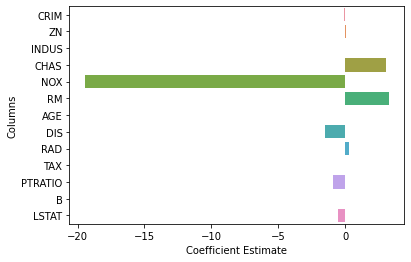

In [30]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [31]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test)

In [32]:
# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

22.57935090722829


In [33]:
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

    Columns  Coefficient Estimate
0      CRIM             -0.101660
1        ZN              0.049340
2     INDUS             -0.042982
3      CHAS              2.636220
4       NOX             -7.085054
5        RM              3.346930
6       AGE             -0.004791
7       DIS             -1.343883
8       RAD              0.273982
9       TAX             -0.012013
10  PTRATIO             -0.752463
11        B              0.010837
12    LSTAT             -0.558259


#### # import Lasso regression from sklearn library 



In [52]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.05) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

In [53]:
# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

Mean squared error on test set 22.83696304925465


In [54]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

    Columns  Coefficient Estimate
0      CRIM             -0.099566
1        ZN              0.049885
2     INDUS             -0.050306
3      CHAS              2.039517
4       NOX             -3.675280
5        RM              3.300728
6       AGE             -0.005626
7       DIS             -1.263735
8       RAD              0.271306
9       TAX             -0.012619
10  PTRATIO             -0.711967
11        B              0.011133
12    LSTAT             -0.570351


In [43]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .01,l1_ratio=.3) 
e_net.fit(x_train, y_train) 

ElasticNet(alpha=0.01, l1_ratio=0.3)

In [44]:
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

Mean Squared Error on test set 22.645778486967327


In [45]:
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

,Columns,Coefficient Estimate
0,CRIM,-0.101177
1,ZN,0.049617
2,INDUS,-0.047584
3,CHAS,2.527164
4,NOX,-5.849196
5,RM,3.335494
6,AGE,-0.005546
7,DIS,-1.323243
8,RAD,0.272936
9,TAX,-0.012194
